In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split

In [2]:
gold = pd.read_csv('ouro2.csv')
gold.columns = ['data', 'today_price']
gold['data']= pd.to_datetime(gold.data) #transform data into datetime
#Variação do preço do ouro
gold['next_week_price'] = gold.today_price.shift(1)
gold['delta'] = gold.next_week_price - gold.today_price
gold['s3'] = gold.delta.rolling(window=3).mean()
gold['s10'] = gold.delta.rolling(window=10).mean()
gold.dropna(inplace=True)

<AxesSubplot:xlabel='data', ylabel='today_price'>

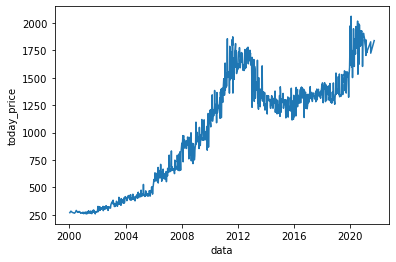

In [3]:
#print timeline graph
sns.lineplot(x=gold.data,y=gold.today_price)

<AxesSubplot:xlabel='data', ylabel='delta'>

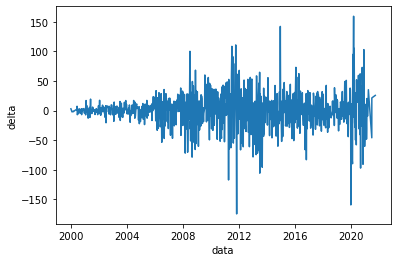

In [4]:
#print timeline graph
sns.lineplot(x=gold.data,y=gold.delta)

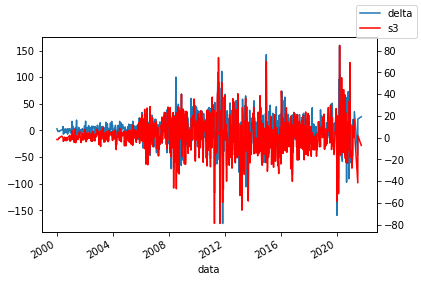

In [5]:
#print timeline graph
ax = gold.plot(x="data", y="delta", legend=False)
ax2 = ax.twinx()
gold.plot(x="data", y="s3", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

# Estacionariedade da série

In [15]:
# ADF Test
result = adfuller(gold.delta, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(gold.delta, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -34.55199885985597
p-value: 0.0
Critial Values:
   1%, -3.436391325753478
Critial Values:
   5%, -2.864207498909067
Critial Values:
   10%, -2.5681902663042324

KPSS Statistic: 0.079985
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/home/yan/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/yan/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


## Autocorrelação e Autocorrelação Parcial
### série normal

/home/yan/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


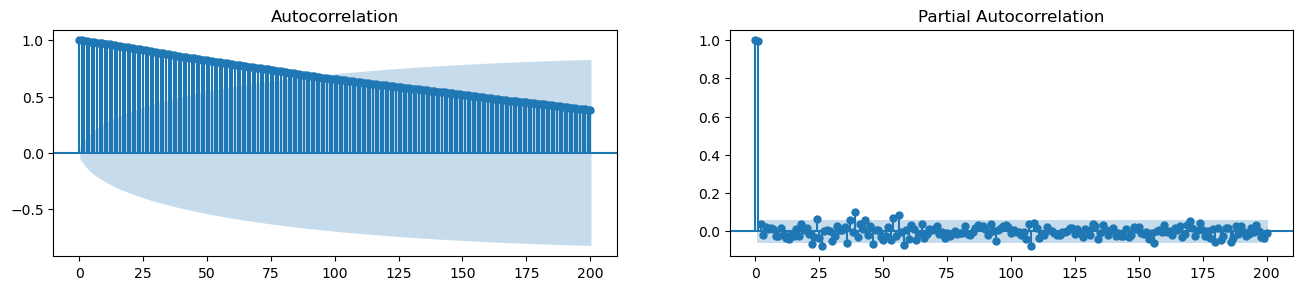

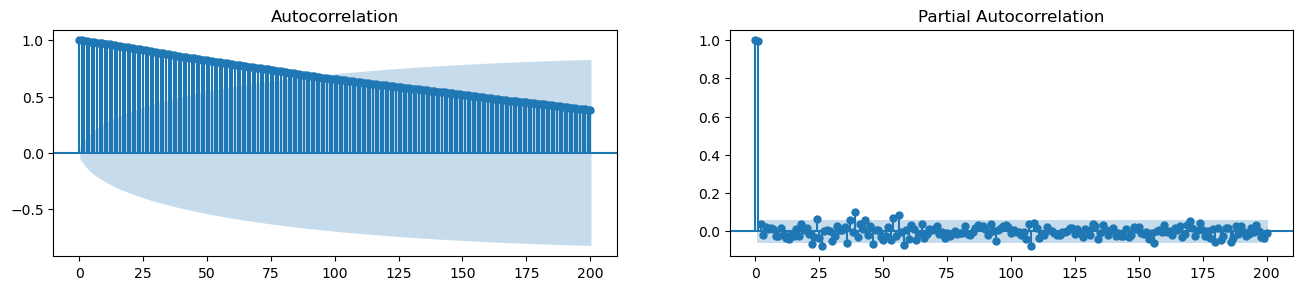

In [7]:
# Calculate ACF and PACF upto 50 lags
acf_50 = acf(gold.today_price, nlags=200)
pacf_50 = pacf(gold.today_price, nlags=200)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(gold.today_price, lags=200, ax=axes[0])
plot_pacf(gold.today_price, lags=200, ax=axes[1])

### Diferença nos preços

/home/yan/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


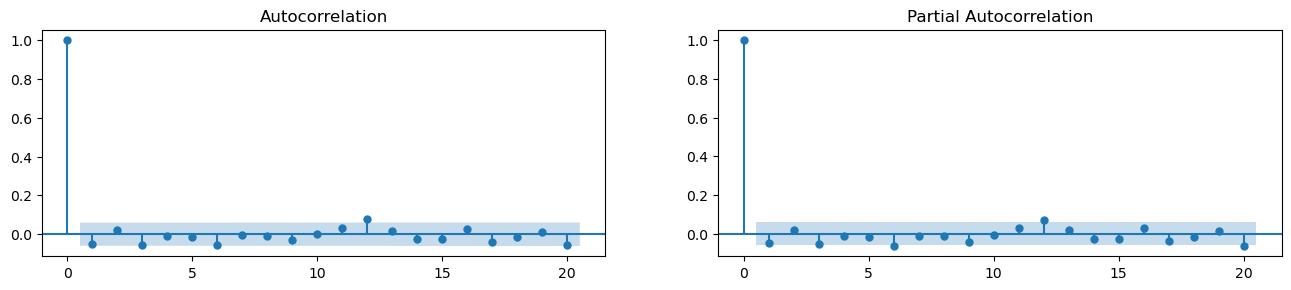

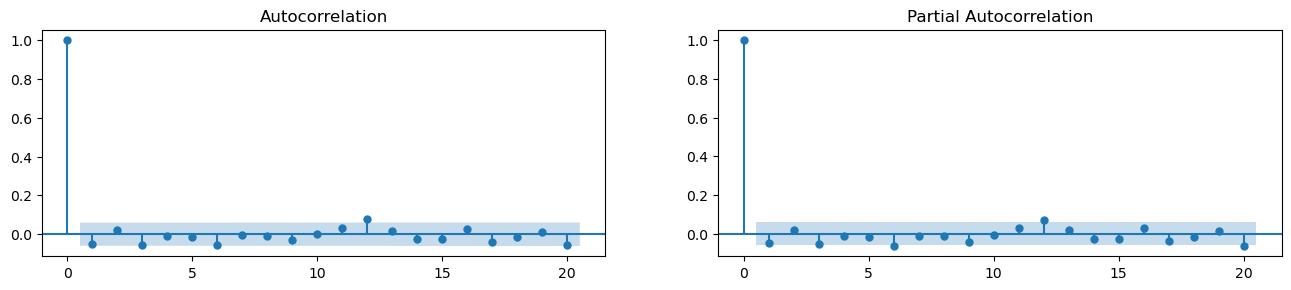

In [8]:
# Calculate ACF and PACF upto 50 lags
acf_50 = acf(gold.delta, nlags=20)
pacf_50 = pacf(gold.delta, nlags=20)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(gold.delta, lags=20, ax=axes[0])
plot_pacf(gold.delta, lags=20, ax=axes[1])

## Conjunto de treinamento

In [9]:
y_TEST = gold.next_week_price[:100] #Consideramos como treinamento os 100 ultimos dias
X_TEST = gold[:100].drop('next_week_price',axis=1)
y_train = gold.next_week_price[100:]
X_train = gold[100:].drop('next_week_price',axis=1)

# Métodos tradicionais

### Modelo autoregressivo

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [11]:
print('y:',y_test.shape)
print('X:',X_train.shape)

y: (326,)
X: (660, 5)
